<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Python_Functions_for_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
from datetime import datetime
import seaborn as sns

In [88]:
from google.colab import files
uploaded = files.upload()

Saving TimeSeriesDataset.xlsx to TimeSeriesDataset.xlsx


In [89]:
df1 = pd.read_excel('TimeSeriesDataset.xlsx') 

In [90]:
df1.head()

,Provider Acct,Deposit Date,Description,Status,Amount,Posted Balance After Transaction,Desc1,Desc2
0,CoppellRev9095,2020-07-03,CREDIT FOR BCBS TEXAS HCCLAIMPMT CO REF-...,POSTED,3574.80,12005.29,CREDIT FOR BCBS TEXAS,HCCLAIMPMT CO REF- C20183E58953170
1,CoppellRev9095,2020-07-06,CREDIT FOR BCBS TEXAS HCCLAIMPMT CO REF-...,POSTED,583.50,12588.79,CREDIT FOR BCBS TEXAS,HCCLAIMPMT CO REF- C20184E22008330
2,CoppellRev9095,2020-07-07,CREDIT FOR AETNA A04 HCCLAIMPMT CO REF-...,POSTED,1298.73,13887.52,CREDIT FOR AETNA A04,HCCLAIMPMT CO REF- 1790205284
3,CoppellRev9095,2020-07-08,CREDIT FOR BCBS TEXAS HCCLAIMPMT CO REF-...,POSTED,1919.04,22852.60,CREDIT FOR BCBS TEXAS,HCCLAIMPMT CO REF- C20188E22319540
4,CoppellRev9095,2020-07-08,CREDIT FOR BCBS TEXAS HCCLAIMPMT CO REF-...,POSTED,7046.04,20933.56,CREDIT FOR BCBS TEXAS,HCCLAIMPMT CO REF- C20188E22319530


In [91]:
df2 = df1.drop(['Status','Provider Acct','Description','Posted Balance After Transaction','Desc1', 'Desc2'],axis=1)

In [93]:
df2.head()

,Deposit Date,Amount
0,2020-07-03,3574.80
1,2020-07-06,583.50
2,2020-07-07,1298.73
3,2020-07-08,1919.04
4,2020-07-08,7046.04


In [94]:
df2 = df2.rename(columns={'Deposit Date': 'Date'})

In [95]:
df2['Date'] = pd.to_datetime(df2.Date)
print (df2)

           Date   Amount
0    2020-07-03  3574.80
1    2020-07-06   583.50
2    2020-07-07  1298.73
3    2020-07-08  1919.04
4    2020-07-08  7046.04
...         ...      ...
4233 2020-10-19  6197.88
4234 2020-10-19   496.13
4235 2020-10-19   876.50
4236 2020-10-19   576.25
4237 2020-10-19  2187.27

[4238 rows x 2 columns]


In [96]:
df2.dtypes

Date      datetime64[ns]
Amount           float64
dtype: object

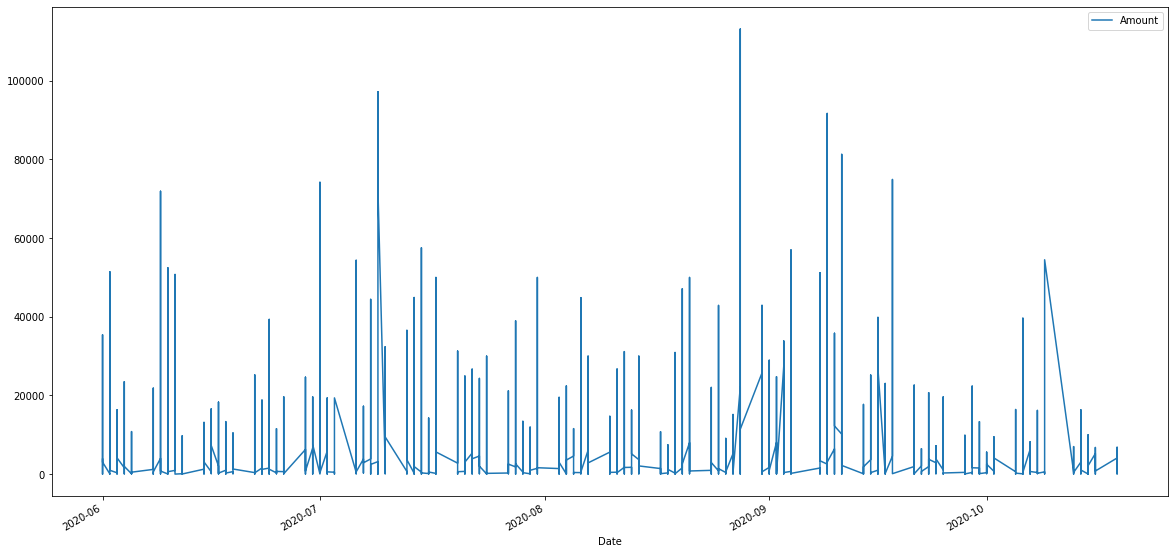

In [97]:
plt = df2.plot(x="Date", y=["Amount"],figsize=(20,10))

In [98]:
df3 = df2.set_index('Date')

In [99]:
df3.head()

,Amount
Date,
2020-07-03,3574.80
2020-07-06,583.50
2020-07-07,1298.73
2020-07-08,1919.04
2020-07-08,7046.04


In [100]:
df3.groupby(df3.index.month).mean()

,Amount
Date,
6,3397.560631
7,4409.582281
8,2941.169800
9,3248.227033
10,2070.657211


In [101]:
df3.groupby(df3.index.year).mean()

,Amount
Date,
2020,3325.503334


In [102]:
df3[:5]

,Amount
Date,
2020-07-03,3574.80
2020-07-06,583.50
2020-07-07,1298.73
2020-07-08,1919.04
2020-07-08,7046.04


In [103]:
df3[:5].cumsum()

,Amount
Date,
2020-07-03,3574.80
2020-07-06,4158.30
2020-07-07,5457.03
2020-07-08,7376.07
2020-07-08,14422.11


In [104]:
df3[:5].pct_change(1)

,Amount
Date,
2020-07-03,NaN
2020-07-06,-0.836774
2020-07-07,1.225758
2020-07-08,0.477628
2020-07-08,2.671648


In [105]:
df3[:5].expanding().sum()

,Amount
Date,
2020-07-03,3574.80
2020-07-06,4158.30
2020-07-07,5457.03
2020-07-08,7376.07
2020-07-08,14422.11


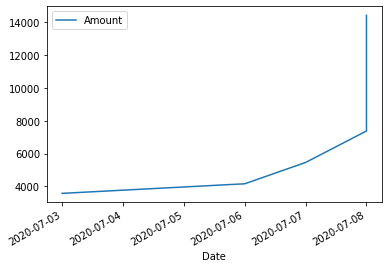

In [106]:
df3[:5].expanding().sum().plot()

In [107]:
df3[:5].expanding().mean()

,Amount
Date,
2020-07-03,3574.8000
2020-07-06,2079.1500
2020-07-07,1819.0100
2020-07-08,1844.0175
2020-07-08,2884.4220


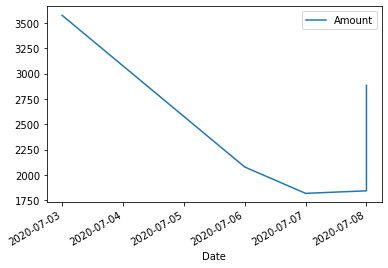

In [108]:
df3[:5].expanding().mean().plot()